In [1]:
%run helper.py

In [2]:
df = pd.read_csv("../data/election-results_statistics-finland.csv").query("Year == 2023 and Sex == 'Total'")
df.rename(columns={"Votes cast (number)":"Votes", "Constituency and municipality in the election year":"Constituency"}, inplace=True)
df.Votes = df.Votes.astype(int)
df = df.query("Votes > 10000").sort_values("Votes")

## Bar Charts

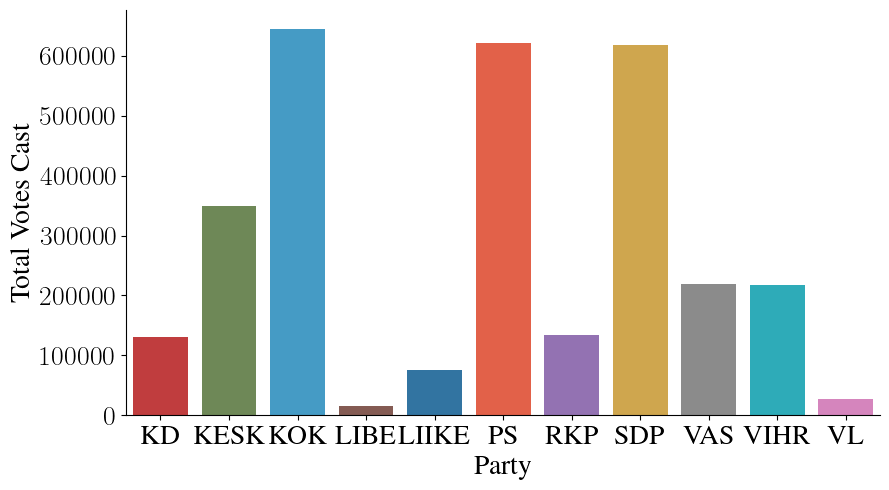

In [3]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.barplot(df.sort_values("Party"), x="Party", y="Votes", ax=ax, palette=cc.glasbey_hv[:11], 
            hue="Party", hue_order=df.sort_values("Votes", ascending=False).Party, legend=False)
ax.set_xlabel("Party")
ax.set_ylabel("Total Votes Cast")
sns.despine(fig)
plt.tight_layout()
plt.savefig("../figures/part_vs_whole-elections_finland.pdf", bbox_inches="tight", transparent=True)

### Sorting facilitates comparisons

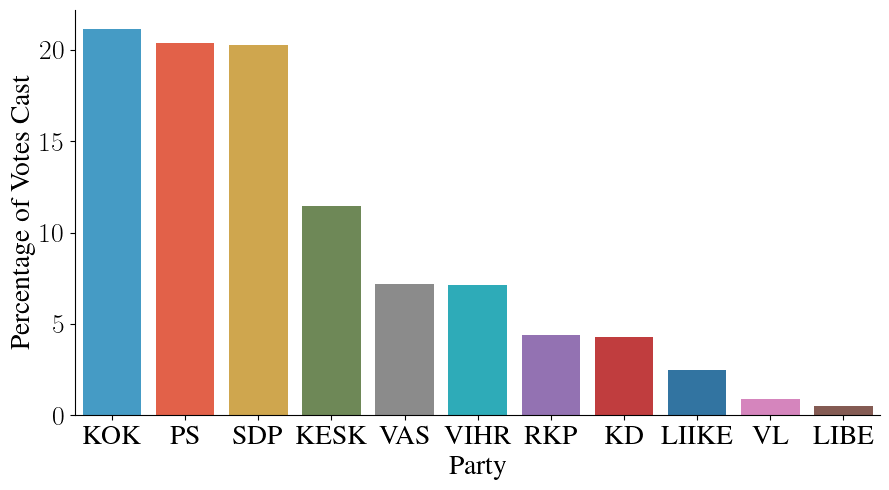

In [4]:
df_normalized = df.sort_values("Votes", ascending=False)
df_normalized["Votes"] = df_normalized["Votes"] * 100 / df_normalized["Votes"].sum()
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.barplot(df_normalized.sort_values("Votes", ascending=False), x="Party", y="Votes", hue="Party", legend=False, 
            ax=ax, palette=cc.glasbey_hv[:11], hue_order=df_normalized.sort_values("Votes", ascending=False).Party)
ax.set_xlabel("Party")
ax.set_ylabel(r"Percentage of Votes Cast")
sns.despine(fig)
plt.tight_layout()
plt.savefig("../figures/part_vs_whole-elections_finland_sorted.pdf", bbox_inches="tight", transparent=True)

### Pie charts are perceptually inferior
See [this paper](https://doi.org/10.1145/1753326.1753357).

In [5]:
df["is_other"] = df.Votes / df.Votes.sum() < 0.025
df_other = df.query("not is_other").reset_index(drop=True).copy()
df_other.loc[len(df_other)] = [2023, "Total", "Other", "Whole country", df.query("is_other").Votes.sum(), True]
df_other.head(1)

,Year,Sex,Party,Constituency,Votes,is_other
0,2023,Total,KD,Whole country,130694,False


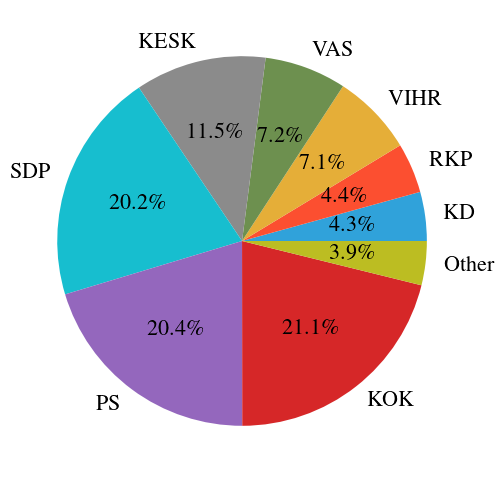

In [6]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plt.pie(df_other["Votes"], labels=df_other["Party"], autopct='%1.1f%%', colors=cc.glasbey_hv[:8] + [cc.glasbey_hv[11]], textprops=dict(fontsize=16));
plt.savefig("../figures/part_vs_whole-elections_finland_sorted_pie.pdf", bbox_inches="tight", transparent=True)

### Individual comparisons plus cumulative analysis

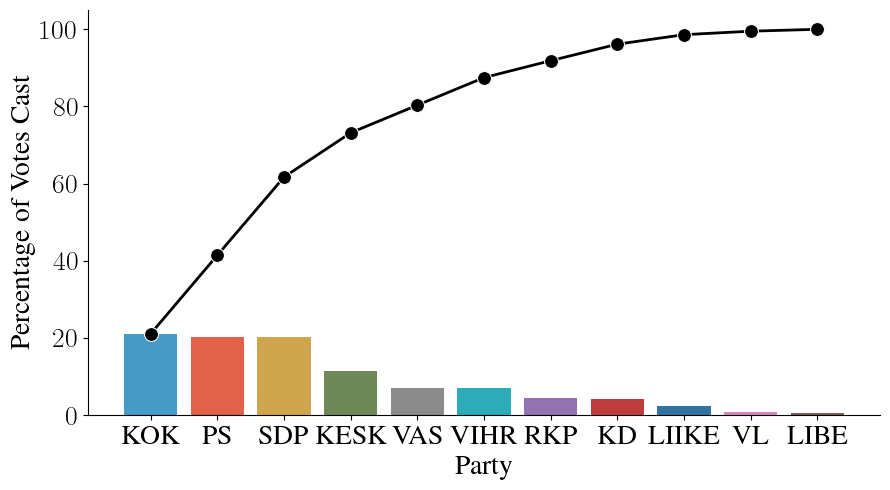

In [7]:
df_normalized = df.sort_values("Votes", ascending=False)
df_normalized["Votes"] = df_normalized["Votes"] * 100 / df_normalized["Votes"].sum()
df_normalized["Votes_cum"] = df_normalized.Votes.transform('cumsum')
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.barplot(df_normalized.sort_values("Votes", ascending=False), x="Party", y="Votes", hue="Party", legend=False, 
            ax=ax, palette=cc.glasbey_hv[:11], hue_order=df_normalized.sort_values("Votes", ascending=False).Party)
sns.lineplot(df_normalized.sort_values("Votes", ascending=False), x="Party", y="Votes_cum", marker="o", color="k", lw=2, markersize=10)
ax.set_xlabel("Party")
ax.set_ylabel(r"Percentage of Votes Cast")
sns.despine(fig)
plt.tight_layout()
plt.savefig("../figures/part_vs_whole-elections_finland_sorted_cumsum.pdf", bbox_inches="tight", transparent=True)